In [1]:
import os, sys, time
# Reference: https://stackoverflow.com/questions/34478398/import-local-function-from-a-module-housed-in-another-directory-with-relative-im
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from importlib import reload

import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import silhouette_samples, silhouette_score


import common
import DimensionalityReduction.DimensionalityReductionDatasets as dr_datasets
from data.faces.faces_data import get_faces_dataset, get_faces_dataset_with_all_labels

title_fontsize = 24
fontsize = 24
legend_fontsize = 18
default_figure_size = (15, 8)

DATASET = "Faces"

/home/richard/.virtualenvs/computervision/lib/python3.8/site-packages/pandas/core/frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [2]:
filenames_train, filenames_test, X_train_faces, X_test_faces, y_train_faces, y_test_faces =\
get_faces_dataset_with_all_labels()

reload(dr_datasets)
ica_faces, _ = dr_datasets.get_faces_ica()

Running ICA for 216 components


In [3]:
reload(common)
n = ica_faces.shape[1]
distortions, davies_bouldin_scores, silhouette_scores, calinski_harabasz_scores, times =\
common.compute_kmeans_scores(ica_faces, n)

For n_clusters = 2 average silhouette_score: 0.18624974600856523 time taken: 0.15129351615905762s
For n_clusters = 3 average silhouette_score: 0.12411525325060101 time taken: 0.18903112411499023s
For n_clusters = 4 average silhouette_score: 0.14961050917236984 time taken: 0.191361665725708s
For n_clusters = 5 average silhouette_score: 0.09834066260418167 time taken: 0.1402268409729004s
For n_clusters = 6 average silhouette_score: 0.0966294621040415 time taken: 0.10441708564758301s
For n_clusters = 7 average silhouette_score: 0.13191185304902872 time taken: 0.1232459545135498s
For n_clusters = 8 average silhouette_score: 0.04664644011648969 time taken: 0.16103339195251465s
For n_clusters = 9 average silhouette_score: 0.049219251152190495 time taken: 0.14996814727783203s
For n_clusters = 10 average silhouette_score: 0.03592041708815319 time taken: 0.1587059497833252s
For n_clusters = 11 average silhouette_score: 0.025612527375903856 time taken: 0.1891162395477295s
For n_clusters = 12 ave

/media/richard/Data/CloudStation/Masters Degree/GATechOMSCS_CourseWork/CS7641-Machine_Learning/UnsupervisedLearning_Project_Code/common.py:66: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  host = fig.add_subplot(111)


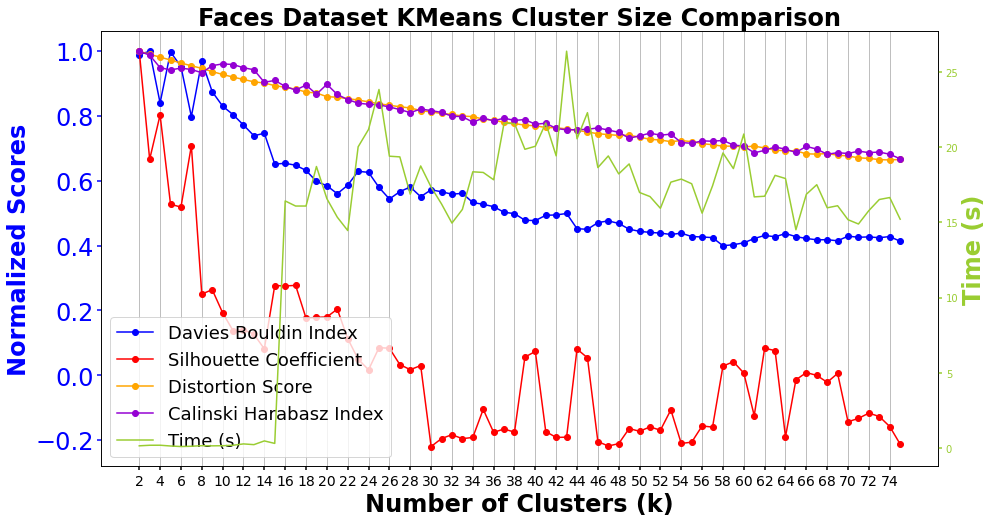

In [4]:
common.plot_kmeans_all(distortions, davies_bouldin_scores, silhouette_scores, calinski_harabasz_scores, times, DATASET)

/media/richard/Data/CloudStation/Masters Degree/GATechOMSCS_CourseWork/CS7641-Machine_Learning/UnsupervisedLearning_Project_Code/common.py:109: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  host = fig.add_subplot(111)


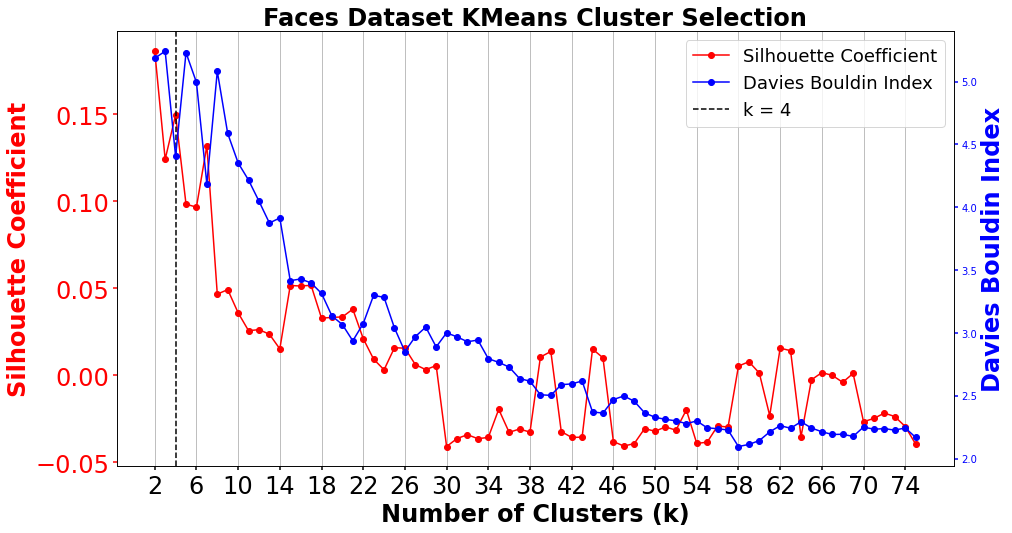

In [30]:
reload(common)
best_k = 4
common.plot_kmeans_selection(davies_bouldin_scores, silhouette_scores, best_k=best_k, DATASET=DATASET)

For n_clusters = 4 average silhouette_score: 0.14961050917236984 time taken: 0.14457225799560547s


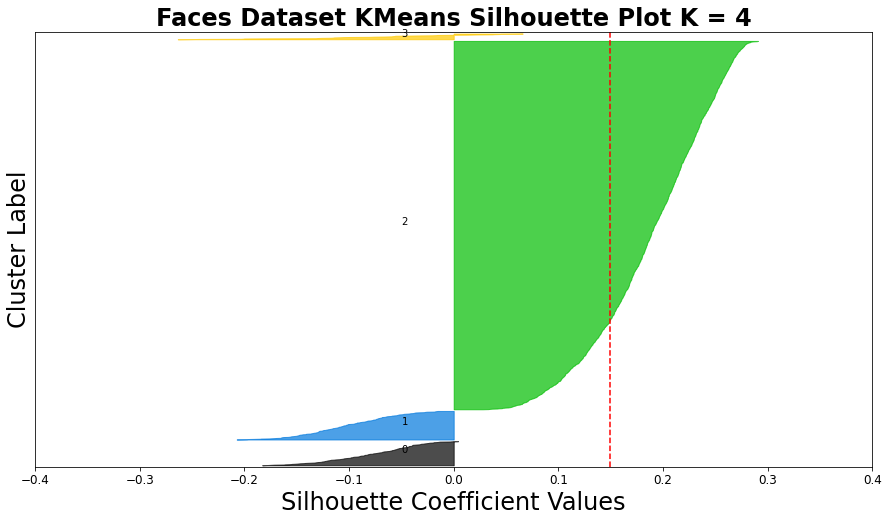

In [31]:
reload(common)
common.plot_silhouette_kmeans(ica_faces, best_k, DATASET, xlim=[-0.4, 0.4])

In [33]:
start_time = time.time()
km = KMeans(n_clusters=best_k, **common.km_arguements)
km.fit(ica_faces)
end_time = time.time()
print("Time Taken {} s".format(end_time - start_time))
y_train_faces['km_labels']=km.labels_
ica_faces_km = pd.DataFrame(ica_faces.copy())
ica_faces_km['km_labels'] = km.labels_
ica_faces_km_vis = ica_faces_km.copy()
ica_faces_km_vis['sex'] = y_train_faces['sex']
ica_faces_km_vis['race'] = y_train_faces['race']

print("homogeneity_score sex: ", homogeneity_score(km.labels_, y_train_faces['sex']))
print("homogeneity_score race: ", homogeneity_score(km.labels_, y_train_faces['race']))
print("Silhouette Score: {}".format(silhouette_score(ica_faces, km.labels_)))

Time Taken 0.19439291954040527 s
homogeneity_score sex:  6.42506384141333e-05
homogeneity_score race:  0.0033722857643728016
Silhouette Score: 0.14961050917236984


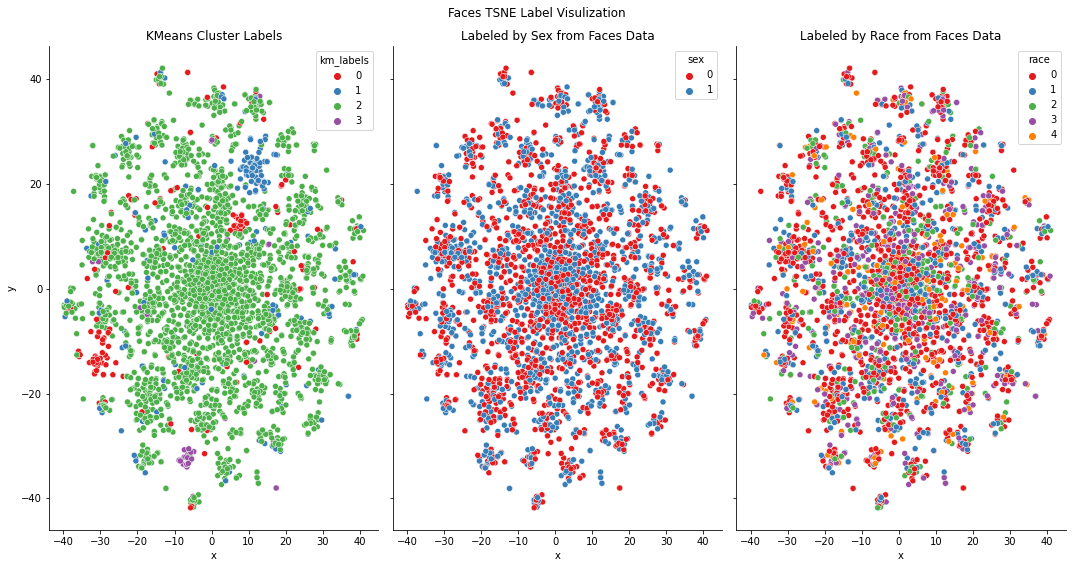

In [8]:
# Create a t-SNE model with learning rate 50
m = TSNE(perplexity=30, learning_rate=50)

# Fit and transform the t-SNE model on the numeric dataset
tsne_features = m.fit_transform(ica_faces)
y_train_faces['x'] = tsne_features[:,0]
y_train_faces['y'] = tsne_features[:,1]

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharex=True, figsize=default_figure_size, sharey=True)

sns.scatterplot(x="x", y="y", hue="km_labels", data=y_train_faces, palette="Set1", ax=ax1)
sns.scatterplot(x="x", y="y", hue="sex", data=y_train_faces, palette="Set1", ax=ax2)
sns.scatterplot(x="x", y="y", hue="race", data=y_train_faces, palette="Set1", ax=ax3)

fig.suptitle("{} TSNE Label Visulization".format(DATASET))
ax1.set_title("KMeans Cluster Labels")
ax2.set_title("Labeled by Sex from Faces Data")
ax3.set_title("Labeled by Race from Faces Data")
sns.despine(fig)
plt.tight_layout()

plt.show()

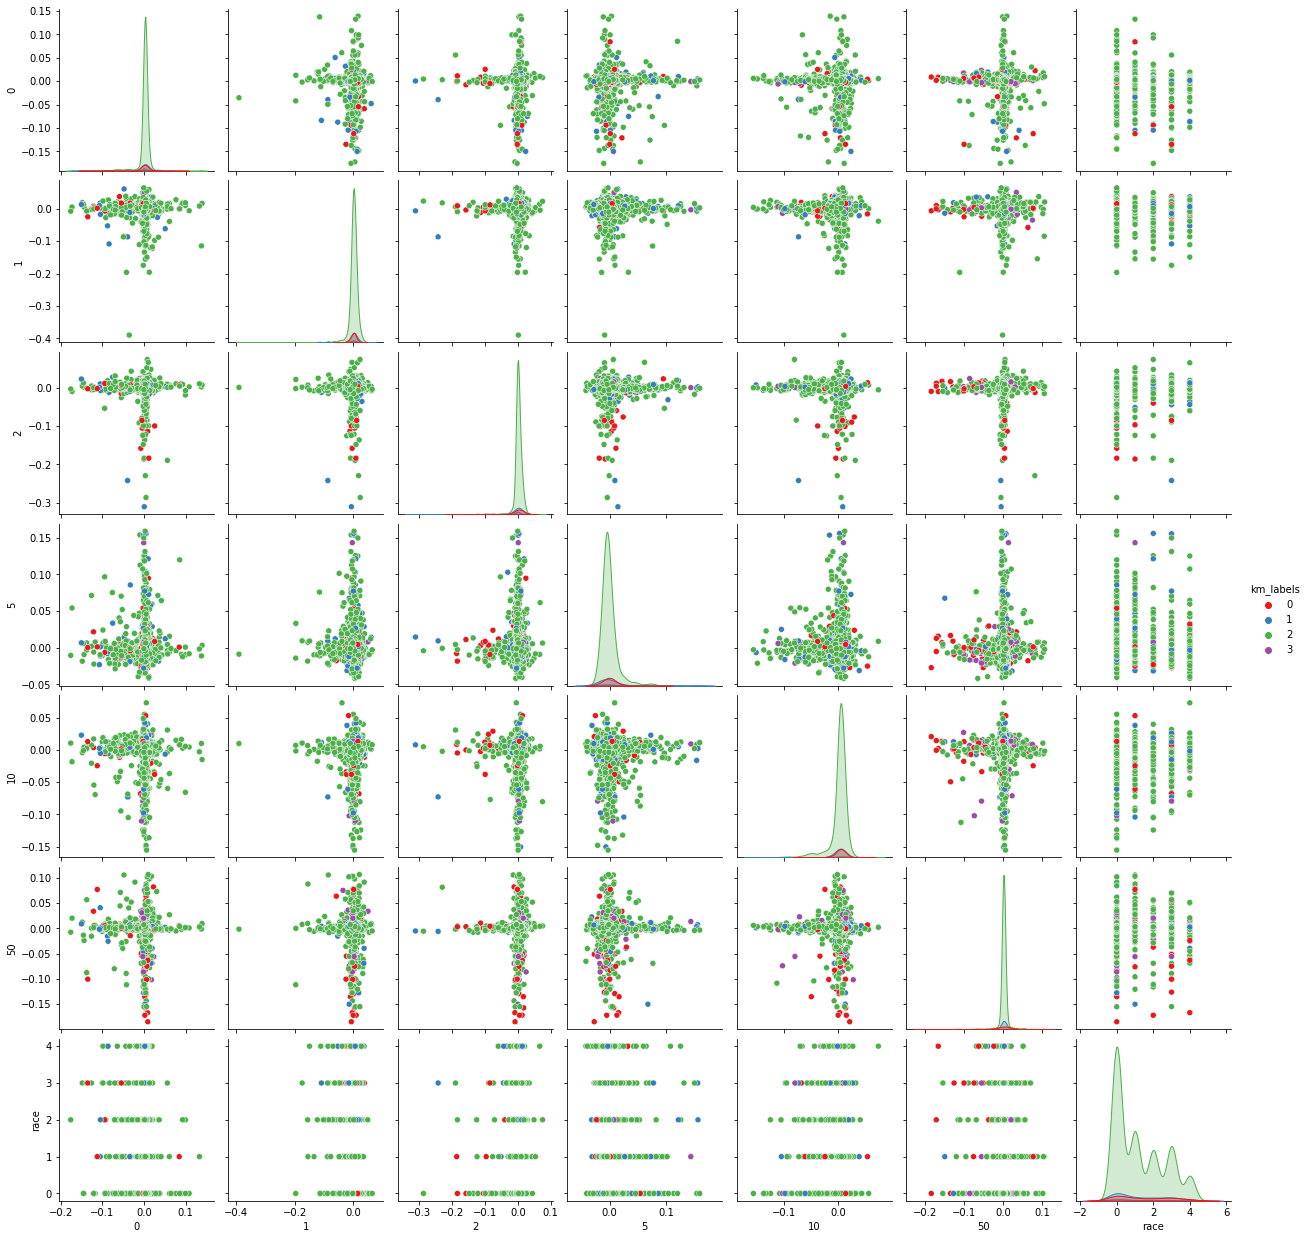

In [9]:
sns.pairplot(ica_faces_km_vis[[0, 1, 2, 5, 10, 50,'race', "km_labels"]], hue="km_labels", palette="Set1")

# Expectation Maximization

In [10]:
reload(common)
em_n = ica_faces.shape[1]
n_components = np.arange(2, em_n)
davies_bouldin_scores_em, silhouette_scores_em, bic_scores_em, aic_scores_em, times_em =\
common.compute_em_scores(ica_faces, em_n)

For n_clusters = 2 average silhouette_score: 0.15256161173527347 time taken: 1.1559102535247803s
For n_clusters = 3 average silhouette_score: 0.04266449812937425 time taken: 1.7799785137176514s
For n_clusters = 4 average silhouette_score: 0.049831041347731406 time taken: 1.877713918685913s
For n_clusters = 5 average silhouette_score: 0.048177180882596427 time taken: 1.5697474479675293s
For n_clusters = 6 average silhouette_score: 0.015100657700526755 time taken: 2.4225001335144043s
For n_clusters = 7 average silhouette_score: 0.02067370578400378 time taken: 2.6768367290496826s
For n_clusters = 8 average silhouette_score: 0.01994417567147523 time taken: 3.1883649826049805s
For n_clusters = 9 average silhouette_score: 0.003121033949902878 time taken: 4.722073078155518s
For n_clusters = 10 average silhouette_score: 0.02010556415659097 time taken: 4.815532207489014s
For n_clusters = 11 average silhouette_score: 0.02611464281066092 time taken: 3.46547532081604s
For n_clusters = 12 average s

/home/richard/.virtualenvs/computervision/lib/python3.8/site-packages/sklearn/mixture/_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '


For n_clusters = 28 average silhouette_score: -0.017811211394613224 time taken: 20.383713245391846s
For n_clusters = 29 average silhouette_score: -0.02123398842914784 time taken: 6.787901163101196s
For n_clusters = 30 average silhouette_score: -0.03219019022999659 time taken: 7.251858949661255s
For n_clusters = 31 average silhouette_score: -0.0317030643083063 time taken: 10.700452327728271s
For n_clusters = 32 average silhouette_score: -0.0020258553406099977 time taken: 6.977074861526489s
For n_clusters = 33 average silhouette_score: -0.007176219475109338 time taken: 9.704585075378418s
For n_clusters = 34 average silhouette_score: -0.012995341041291424 time taken: 13.6074697971344s
For n_clusters = 35 average silhouette_score: -0.02851208125011287 time taken: 12.116905212402344s
For n_clusters = 36 average silhouette_score: -0.026212446921994578 time taken: 8.915647983551025s
For n_clusters = 37 average silhouette_score: -0.032384654450361566 time taken: 8.58009648323059s
For n_cluster

/media/richard/Data/CloudStation/Masters Degree/GATechOMSCS_CourseWork/CS7641-Machine_Learning/UnsupervisedLearning_Project_Code/common.py:250: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  host = fig.add_subplot(111)


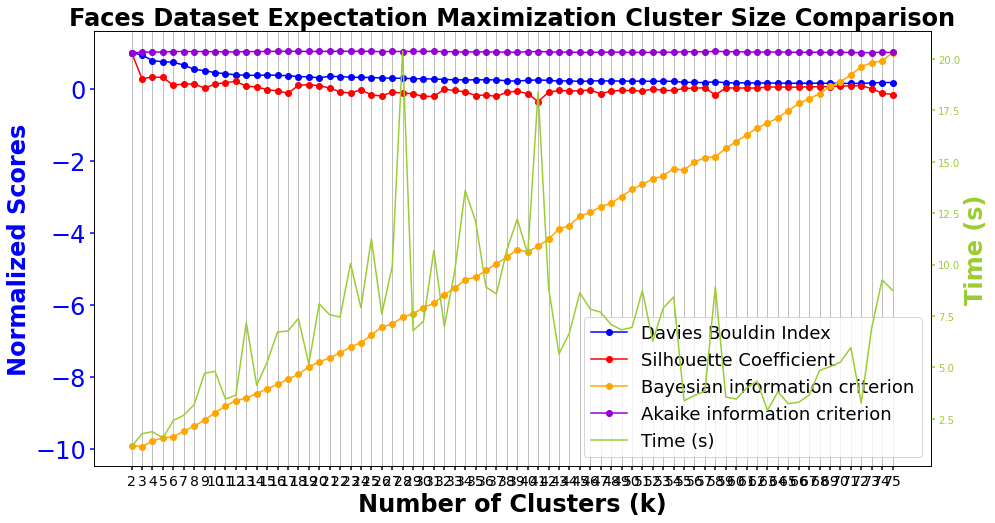

In [11]:
reload(common)
common.plot_em_all(davies_bouldin_scores_em, silhouette_scores_em, bic_scores_em, aic_scores_em, times_em, DATASET)

/media/richard/Data/CloudStation/Masters Degree/GATechOMSCS_CourseWork/CS7641-Machine_Learning/UnsupervisedLearning_Project_Code/common.py:301: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  host = fig.add_subplot(111)


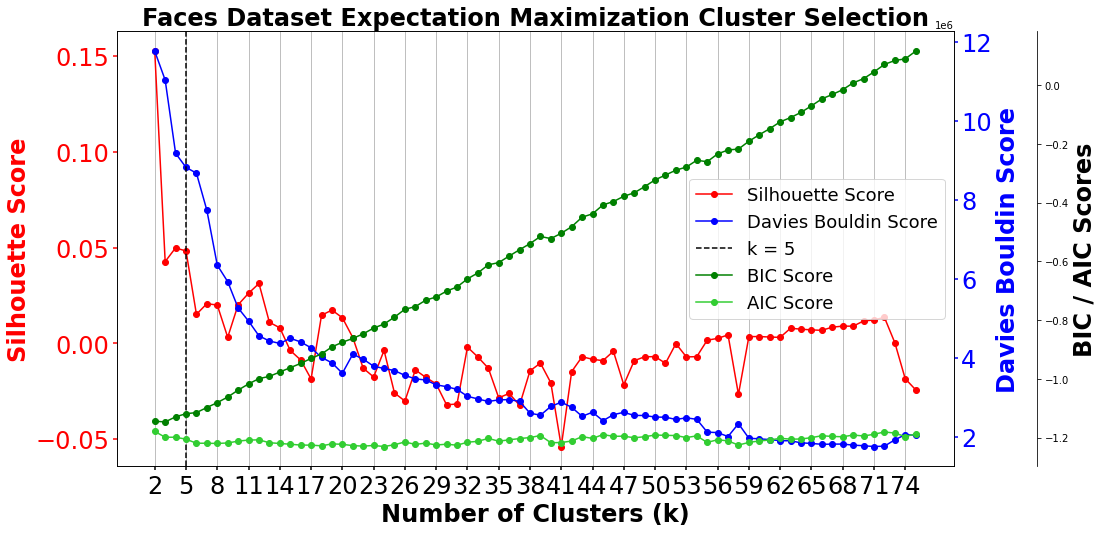

In [34]:
reload(common)
best_k = 5
common.plot_em_selection(davies_bouldin_scores_em, silhouette_scores_em, bic_scores_em, aic_scores_em, best_k, DATASET, tick_spacing=3)

For n_clusters = 5 average silhouette_score: 0.048177180882596427 time taken: 1.0659160614013672s


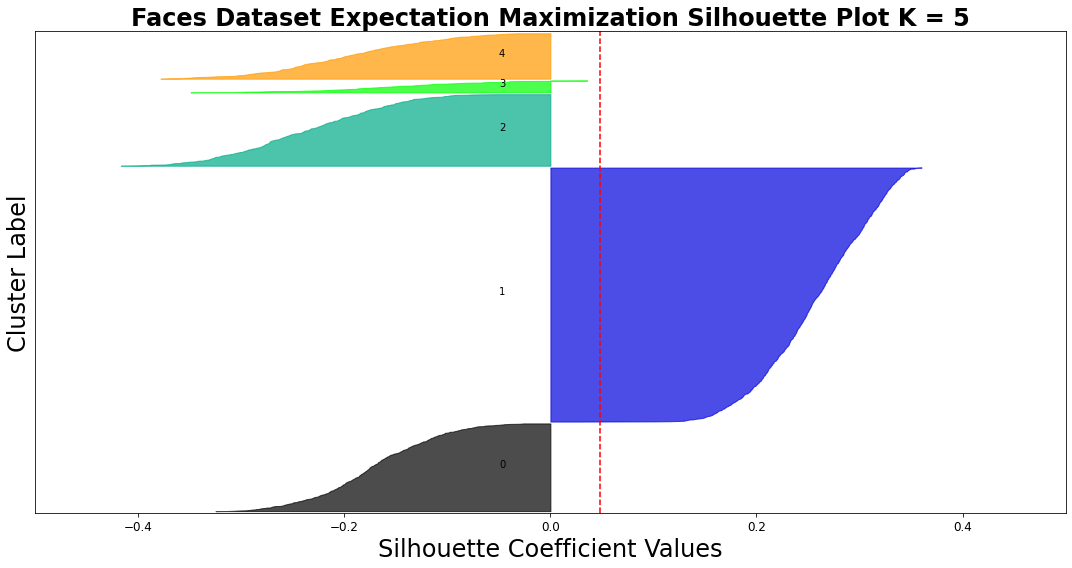

In [35]:
reload(common)
best_k=5
common.plot_silhouette_em(ica_faces, best_k, DATASET, xlim=[-0.5, 0.5])

In [40]:
start_time = time.time()
em_model = GaussianMixture(best_k, covariance_type='full', random_state=42)
em_model.fit(ica_faces)
end_time = time.time()
print("time taken {} s".format(end_time-start_time))
y_train_faces['em_labels']=em_model.predict(ica_faces)
ica_faces_gm = pd.DataFrame(ica_faces.copy())
ica_faces_gm['em_labels'] = em_model.predict(ica_faces)

ica_faces_gm_vis = ica_faces_gm.copy()
ica_faces_gm_vis['sex'] = y_train_faces['sex']
ica_faces_gm_vis['race'] = y_train_faces['race']

print("homogeneity_score sex: ", homogeneity_score(em_model.predict(ica_faces), y_train_faces['sex']))
print("homogeneity_score race: ", homogeneity_score(em_model.predict(ica_faces), y_train_faces['race']))
print("Silhouette Score: {}".format(silhouette_score(ica_faces, em_model.predict(ica_faces))))

time taken 1.677891492843628 s
homogeneity_score sex:  0.00012154789827807942
homogeneity_score race:  0.0016930245357569512
Silhouette Score: 0.03822644915291032


In [37]:
# Create a t-SNE model with learning rate 50
m = TSNE(perplexity=30, learning_rate=50)

# Fit and transform the t-SNE model on the numeric dataset
tsne_features = m.fit_transform(ica_faces)
y_train_faces['x'] = tsne_features[:,0]
y_train_faces['y'] = tsne_features[:,1]

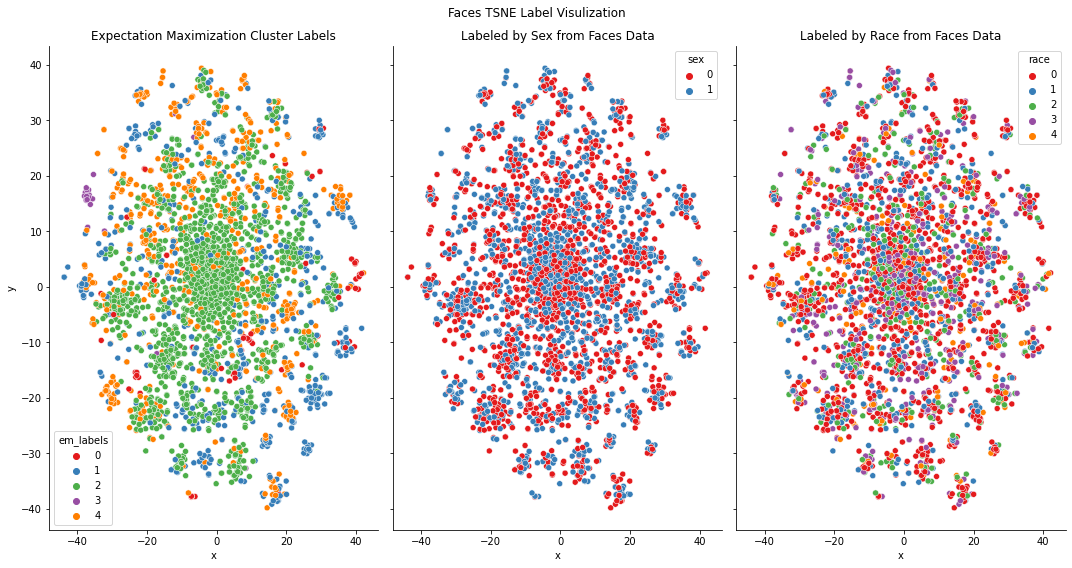

In [38]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharex=True, figsize=default_figure_size, sharey=True)

sns.scatterplot(x="x", y="y", hue="em_labels", data=y_train_faces, palette="Set1", ax=ax1)
sns.scatterplot(x="x", y="y", hue="sex", data=y_train_faces, palette="Set1", ax=ax2)
sns.scatterplot(x="x", y="y", hue="race", data=y_train_faces, palette="Set1", ax=ax3)

fig.suptitle("{} TSNE Label Visulization".format(DATASET))
ax1.set_title("Expectation Maximization Cluster Labels")
ax2.set_title("Labeled by Sex from Faces Data")
ax3.set_title("Labeled by Race from Faces Data")
sns.despine(fig)
plt.tight_layout()

plt.show()

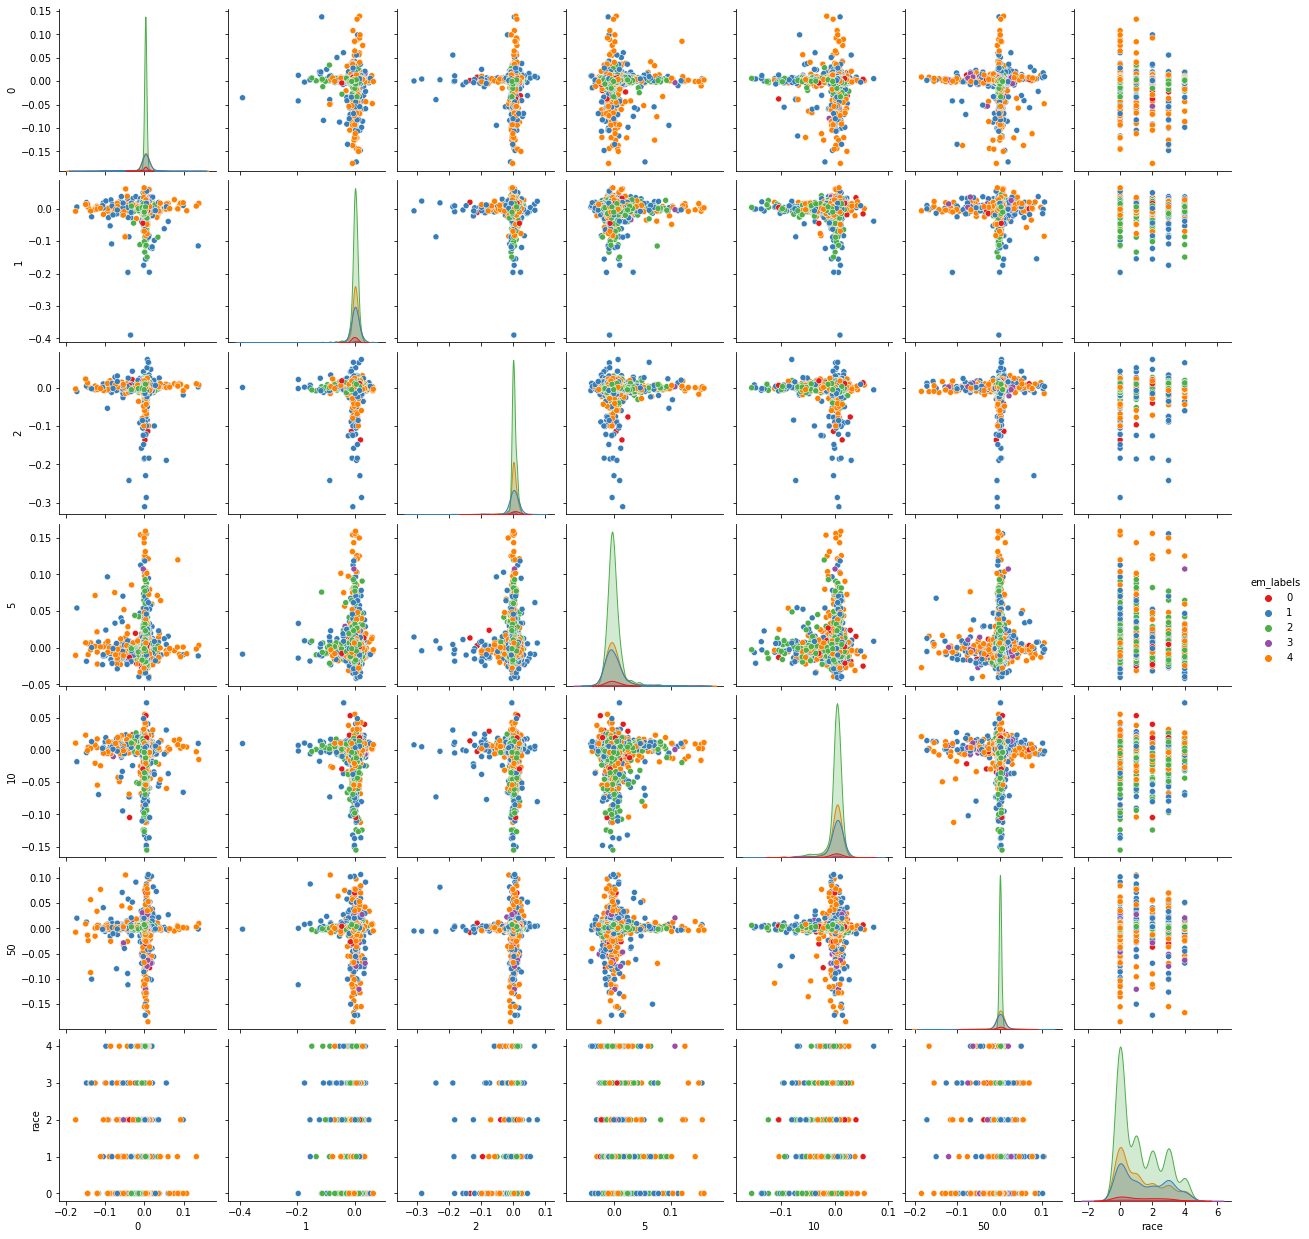

In [26]:
sns.pairplot(ica_faces_gm_vis[[0, 1, 2, 5, 10, 50, "race", "em_labels"]], hue="em_labels", palette="Set1")